# MSDS

In [1]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["font.family"] = "Source Han Sans JP"  # 使用するフォント
plt.rcParams["xtick.direction"] = "in"  # x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"  # y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.width"] = 1.0  # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.0  # y軸主目盛り線の線幅
plt.rcParams["font.size"] = 12  # フォントの大きさ
plt.rcParams["axes.linewidth"] = 1.0  # 軸の線幅edge linewidth。囲みの太さ
matplotlib.font_manager._rebuild()


class ImageLoader:
    def __init__(self, FILE_PATH):
        self.img = np.array(Image.open(FILE_PATH))
        # 行数
        self.row_blocks_count = self.img.shape[0] // 8
        # 列数
        self.col_blocks_count = self.img.shape[1] // 8


MONO_DIR_PATH = "Mono/"

AIRPLANE = ImageLoader(MONO_DIR_PATH + "airplane512.bmp")
BARBARA = ImageLoader(MONO_DIR_PATH + "barbara512.bmp")
BOAT = ImageLoader(MONO_DIR_PATH + "boat512.bmp")
GOLDHILL = ImageLoader(MONO_DIR_PATH + "goldhill512.bmp")
LENNA = ImageLoader(MONO_DIR_PATH + "lenna512.bmp")
MANDRILL = ImageLoader(MONO_DIR_PATH + "mandrill512.bmp")
MILKDROP = ImageLoader(MONO_DIR_PATH + "milkdrop512.bmp")
SAILBOAT = ImageLoader(MONO_DIR_PATH + "sailboat512.bmp")
TEST02 = ImageLoader(MONO_DIR_PATH + "test02.bmp")
TEST19 = ImageLoader(MONO_DIR_PATH + "test19.bmp")
N8RGB = ImageLoader(MONO_DIR_PATH + "N8RGB.bmp")

## MSDS_1

$$
MSDS_1 = \varepsilon_w + \varepsilon_e + \varepsilon_s+\varepsilon_n
$$

$$
\varepsilon_w = \sum^7_{m=0} [d_1(m)-d_2(m)]^2
$$

縦横の隣接する境界間の強度勾配
$$
d_1(m) = f(m,0)-w(m,7)
$$

縦横の隣接する境界間の強度勾配の平均
$$
d_2(m)=\frac{w(m,7)-w(m,6)}{2} + \frac{f(m,1)-f(m,0)}{2}
$$

In [4]:
IMG = BOAT

In [5]:
IMG.img = IMG.img.astype("int64")

In [4]:
w_e = 0
e_e = 0
n_e = 0
s_e = 0
for row in range(IMG.img.shape[0] // 8):
    for col in range(IMG.img.shape[1] // 8):
        f_block = IMG.img[row * 8 : (row + 1) * 8, col * 8 : (col + 1) * 8]
        # w
        if col == 0:
            w_block = np.fliplr(f_block)
        else:
            w_block = IMG.img[row * 8 : (row + 1) * 8, (col - 1) * 8 : col * 8]
        # e
        if col == IMG.img.shape[1] // 8 - 1:
            e_block = np.fliplr(f_block)
        else:
            e_block = IMG.img[row * 8 : (row + 1) * 8, (col + 1) * 8 : (col + 2) * 8]
        # n
        if row == 0:
            n_block = np.flipud(f_block)
        else:
            n_block = IMG.img[(row - 1) * 8 : row * 8, col * 8 : (col + 1) * 8]
        # s
        if row == IMG.img.shape[0] // 8 - 1:
            s_block = np.flipud(f_block)
        else:
            s_block = IMG.img[(row + 1) * 8 : (row + 2) * 8, col * 8 : (col + 1) * 8]

        w_d1 = f_block[:, 0] - w_block[:, 7]
        e_d1 = f_block[:, 7] - e_block[:, 0]
        n_d1 = f_block[0, :] - n_block[7, :]
        s_d1 = f_block[7, :] - s_block[0, :]

        w_d2 = (w_block[:, 7] - w_block[:, 6] + f_block[:, 1] - f_block[:, 0]) / 2
        e_d2 = (e_block[:, 1] - e_block[:, 0] + f_block[:, 7] - f_block[:, 6]) / 2
        n_d2 = (n_block[7, :] - n_block[6, :] + f_block[1, :] - f_block[0, :]) / 2
        s_d2 = (s_block[1, :] - s_block[0, :] + f_block[7, :] - f_block[6, :]) / 2

        w_e += np.sum((w_d1 - w_d2) ** 2)
        e_e += np.sum((e_d1 - e_d2) ** 2)
        n_e += np.sum((n_d1 - n_d2) ** 2)
        s_e += np.sum((s_d1 - s_d2) ** 2)
#         print(
#             row,
#             col,
#             np.sum((w_d1 - w_d2) ** 2)
#             + np.sum((e_d1 - e_d2) ** 2)
#             + np.sum((n_d1 - n_d2) ** 2)
#             + np.sum((s_d1 - s_d2) ** 2),
#         )

msds1 = (w_e + e_e + n_e + s_e) / (512 / 8) ** 2

In [5]:
f_block = IMG.img[row * 8 : (row + 1) * 8, col * 8 : (col + 1) * 8]

In [6]:
f_block[:, 0]

array([108,  95, 114, 131, 121, 109, 115, 102])

10390.75

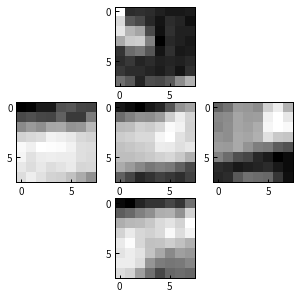

In [7]:
w_e = 0
e_e = 0
n_e = 0
s_e = 0
col = 13
row = 53

f_block = IMG.img[row * 8 : (row + 1) * 8, col * 8 : (col + 1) * 8]
# w
if col == 0:
    w_block = np.fliplr(f_block)
else:
    w_block = IMG.img[row * 8 : (row + 1) * 8, (col - 1) * 8 : col * 8]
# e
if col == IMG.img.shape[1] // 8 - 1:
    e_block = np.fliplr(f_block)
else:
    e_block = IMG.img[row * 8 : (row + 1) * 8, (col + 1) * 8 : (col + 2) * 8]
# n
if row == 0:
    n_block = np.flipud(f_block)
else:
    n_block = IMG.img[(row - 1) * 8 : row * 8, col * 8 : (col + 1) * 8]
# s
if row == IMG.img.shape[0] // 8 - 1:
    s_block = np.flipud(f_block)
else:
    s_block = IMG.img[(row + 1) * 8 : (row + 2) * 8, col * 8 : (col + 1) * 8]

w_d1 = f_block[:, 0] - w_block[:, 7]
e_d1 = f_block[:, 7] - e_block[:, 0]
n_d1 = f_block[0, :] - n_block[7, :]
s_d1 = f_block[7, :] - s_block[0, :]

w_d2 = (w_block[:, 7] - w_block[:, 6] + f_block[:, 1] - f_block[:, 0]) / 2
e_d2 = (e_block[:, 1] - e_block[:, 0] + f_block[:, 7] - f_block[:, 6]) / 2
n_d2 = (n_block[7, :] - n_block[6, :] + f_block[1, :] - f_block[0, :]) / 2
s_d2 = (s_block[1, :] - s_block[0, :] + f_block[7, :] - f_block[6, :]) / 2

w_e += np.sum((w_d1 - w_d2) ** 2)
e_e += np.sum((e_d1 - e_d2) ** 2)
n_e += np.sum((n_d1 - n_d2) ** 2)
s_e += np.sum((s_d1 - s_d2) ** 2)

plt.figure(figsize=(5, 5))
plt.subplot(3, 3, 5)
plt.imshow(f_block, cmap="gray")
plt.subplot(3, 3, 4)
plt.imshow(w_block, cmap="gray")
plt.subplot(3, 3, 2)
plt.imshow(n_block, cmap="gray")
plt.subplot(3, 3, 6)
plt.imshow(e_block, cmap="gray")
plt.subplot(3, 3, 8)
plt.imshow(s_block, cmap="gray")
(w_e + e_e + n_e + s_e)

In [8]:
e_block[:, 0]

array([124, 140, 138, 145, 149, 137, 100,  97])

In [9]:
f_block[:, 7]

array([130, 148, 147, 148, 155, 135,  97,  94])

In [10]:
f_block[:, 7] - e_block[:, 0]

array([ 6,  8,  9,  3,  6, -2, -3, -3])

In [11]:
np.sum(f_block[:, 7] - e_block[:, 0])

24

In [12]:
(e_block[:, 7] - e_block[:, 6] + f_block[:1] - f_block[:, 0]) / 2

array([[-13. , -23. , -36. , -34. , -31. , -17. ,  -7.5,   3.5]])

In [13]:
np.sum((e_block[:, 7] - e_block[:, 6] + f_block[:, 1] - f_block[:, 0]) / 2)

-36.5

In [14]:
np.array([1, 2, 3]) * np.array([1, 2, 3])

array([1, 4, 9])

In [15]:
np.array([1, 2, 3]) ** 2

array([1, 4, 9])

# MSDS_2

$$
MSDS_2 = \varepsilon_{nw}+ \varepsilon_{ne} + \varepsilon_{sw}+\varepsilon_{se}
$$

$$
\varepsilon_{nw} = [g_1-g_2]^2
$$

$$
g_1 = f(0,0) - nw(7,7)
$$

$$
g_2 = \frac{nw(7,7)-nw(6,6)}{2} + \frac{f(1,1)-f(0,0)}{2}
$$

In [52]:
nw_e = 0
ne_e = 0
sw_e = 0
se_e = 0
for row in range(IMG.img.shape[0] // 8):
    for col in range(IMG.img.shape[1] // 8):
        f_block = IMG.img[row * 8 : (row + 1) * 8, col * 8 : (col + 1) * 8]
        # nw
        if row == 0 or col == 0:
            nw_block = np.flipud(np.fliplr(f_block))
        else:
            nw_block = IMG.img[(row - 1) * 8 : row * 8, (col - 1) * 8 : col * 8]
        # ne
        if row == 0 or col == IMG.img.shape[1] // 8 - 1:
            ne_block = np.flipud(np.fliplr(f_block))
        else:
            ne_block = IMG.img[(row-1) * 8 : row * 8, (col + 1) * 8 : (col + 2) * 8]
        # sw
        if row == IMG.img.shape[0] // 8 -1 or col == 0:
            sw_block = np.flipud(np.fliplr(f_block))
        else:
            sw_block = IMG.img[row * 8 : (row+1) * 8, (col-1) * 8 : col * 8]
        # se
        if  row == IMG.img.shape[0]//8-1 or col == IMG.img.shape[0] // 8 -1:
            se_block = np.flipud(np.fliplr(f_block))
        else:
            se_block = IMG.img[(row + 1) * 8 : (row + 2) * 8, (col+1) * 8 : (col + 2) * 8]

        nw_g1 = f_block[0, 0] - nw_block[7, 7]
        ne_g1 = f_block[0, 7] - ne_block[7, 0]
        sw_g1 = f_block[7, 0] - sw_block[0, 7]
        se_g1 = f_block[7, 7] - se_block[0, 0]

        nw_g2 = (nw_block[7,7] - nw_block[6,6] + f_block[1,1] - f_block[0,0])/2
        ne_g2 = (ne_block[7,0] - ne_block[6,1] + f_block[1,6] - f_block[0,7])/2
        sw_g2 = (sw_block[0,7] - nw_block[1,6] + f_block[6,1] - f_block[7,0])/2
        se_g2 = (nw_block[0,0] - nw_block[1,1] + f_block[6,6] - f_block[7,7])/2

        nw_e += (nw_g1 - nw_g2) ** 2
        ne_e += (ne_g1 - ne_g2) ** 2
        sw_e += (sw_g1 - sw_g2) ** 2
        se_e += (se_g1 - se_g2) ** 2

msds2 =  (nw_e + ne_e + sw_e + se_e) / (512 / 8) ** 2

In [53]:
msds1

4730.8681640625

In [54]:
msds2

1580.657470703125

In [56]:
(w_e + e_e + n_e + s_e + nw_e + ne_e + sw_e + se_e) / (512 / 8) ** 2

6311.525634765625

In [58]:
(msds1 + msds2)/4

1577.8814086914062

In [59]:
msds1 /4 + msds2/4

1577.8814086914062

In [33]:
w_e = 0
e_e = 0
n_e = 0
s_e = 0
for row in range(IMG.img.shape[0] // 8):
    for col in range(IMG.img.shape[1] // 8):
        f_block = IMG.img[row * 8 : (row + 1) * 8, col * 8 : (col + 1) * 8]
        # w
        if col == 0:
            w_block = np.fliplr(f_block)
        else:
            w_block = IMG.img[row * 8 : (row + 1) * 8, (col - 1) * 8 : col * 8]
        # e
        if col == IMG.img.shape[1] // 8 - 1:
            e_block = np.fliplr(f_block)
        else:
            e_block = IMG.img[row * 8 : (row + 1) * 8, (col + 1) * 8 : (col + 2) * 8]
        # n
        if row == 0:
            n_block = np.flipud(f_block)
        else:
            n_block = IMG.img[(row - 1) * 8 : row * 8, col * 8 : (col + 1) * 8]
        # s
        if row == IMG.img.shape[0] // 8 - 1:
            s_block = np.flipud(f_block)
        else:
            s_block = IMG.img[(row + 1) * 8 : (row + 2) * 8, col * 8 : (col + 1) * 8]

        w_d1 = f_block[:, 0] - w_block[:, 7]
        e_d1 = f_block[:, 7] - e_block[:, 0]
        n_d1 = f_block[0, :] - n_block[7, :]
        s_d1 = f_block[7, :] - s_block[0, :]

        w_d2 = (w_block[:, 7] - w_block[:, 6] + f_block[:, 1] - f_block[:, 0]) / 2
        e_d2 = (e_block[:, 1] - e_block[:, 0] + f_block[:, 7] - f_block[:, 6]) / 2
        n_d2 = (n_block[7, :] - n_block[6, :] + f_block[1, :] - f_block[0, :]) / 2
        s_d2 = (s_block[1, :] - s_block[0, :] + f_block[7, :] - f_block[6, :]) / 2

        w_e = np.sum((w_d1 - w_d2) ** 2)
        e_e = np.sum((e_d1 - e_d2) ** 2)
        n_e = np.sum((n_d1 - n_d2) ** 2)
        s_e = np.sum((s_d1 - s_d2) ** 2)
        msds1 += (w_e + e_e + n_e + s_e)/4

In [34]:
msds1

7442793.637084961

In [35]:
msds1 / ((512/8) ** 2)

1817.0882903039455

In [37]:
nw_e = 0
ne_e = 0
sw_e = 0
se_e = 0
for row in range(IMG.img.shape[0] // 8):
    for col in range(IMG.img.shape[1] // 8):
        f_block = IMG.img[row * 8 : (row + 1) * 8, col * 8 : (col + 1) * 8]
        # nw
        if row == 0 or col == 0:
            nw_block = np.flipud(np.fliplr(f_block))
        else:
            nw_block = IMG.img[(row - 1) * 8 : row * 8, (col - 1) * 8 : col * 8]
        # ne
        if row == 0 or col == IMG.img.shape[1] // 8 - 1:
            ne_block = np.flipud(np.fliplr(f_block))
        else:
            ne_block = IMG.img[(row-1) * 8 : row * 8, (col + 1) * 8 : (col + 2) * 8]
        # sw
        if row == IMG.img.shape[0] // 8 -1 or col == 0:
            sw_block = np.flipud(np.fliplr(f_block))
        else:
            sw_block = IMG.img[row * 8 : (row+1) * 8, (col-1) * 8 : col * 8]
        # se
        if  row == IMG.img.shape[0]//8-1 or col == IMG.img.shape[0] // 8 -1:
            se_block = np.flipud(np.fliplr(f_block))
        else:
            se_block = IMG.img[(row + 1) * 8 : (row + 2) * 8, (col+1) * 8 : (col + 2) * 8]

        nw_g1 = f_block[0, 0] - nw_block[7, 7]
        ne_g1 = f_block[0, 7] - ne_block[7, 0]
        sw_g1 = f_block[7, 0] - sw_block[0, 7]
        se_g1 = f_block[7, 7] - se_block[0, 0]

        nw_g2 = (nw_block[7,7] - nw_block[6,6] + f_block[1,1] - f_block[0,0])/2
        ne_g2 = (ne_block[7,0] - ne_block[6,1] + f_block[1,6] - f_block[0,7])/2
        sw_g2 = (sw_block[0,7] - nw_block[1,6] + f_block[6,1] - f_block[7,0])/2
        se_g2 = (nw_block[0,0] - nw_block[1,1] + f_block[6,6] - f_block[7,7])/2

        nw_e += (nw_g1 - nw_g2) ** 2
        ne_e += (ne_g1 - ne_g2) ** 2
        sw_e += (sw_g1 - sw_g2) ** 2
        se_e += (se_g1 - se_g2) ** 2
        
        msds2 = (nw_e + ne_e + sw_e + se_e) /4 

In [38]:
msds2

2948945.5625

In [39]:
msds2 / ((512/8)**2)

719.9574127197266

# 結果的にこう。数値は一致しない

1ブロックあたりのMSDSを求める

## NxN

In [2]:
def msds(N,arr):
    w_e = 0
    e_e = 0
    n_e = 0
    s_e = 0
    nw_e = 0
    ne_e = 0
    sw_e = 0
    se_e = 0
    for row in range(arr.shape[0] // N):
        for col in range(arr.shape[1] // N):
            f_block = arr[row * N : (row + 1) * N, col * N : (col + 1) * N]
            # w
            if col == 0:
                w_block = np.fliplr(f_block)
            else:
                w_block = arr[row * N : (row + 1) * N, (col - 1) * N : col * N]
            # e
            if col == arr.shape[1] // N - 1:
                e_block = np.fliplr(f_block)
            else:
                e_block = arr[row * N : (row + 1) * N, (col + 1) * N : (col + 2) * N]
            # n
            if row == 0:
                n_block = np.flipud(f_block)
            else:
                n_block = arr[(row - 1) * N : row * N, col * N : (col + 1) * N]
            # s
            if row == arr.shape[0] // N - 1:
                s_block = np.flipud(f_block)
            else:
                s_block = arr[(row + 1) * N : (row + 2) * N, col * N : (col + 1) * N]

            w_d1 = f_block[:, 0] - w_block[:, N-1]
            e_d1 = f_block[:, N-1] - e_block[:, 0]
            n_d1 = f_block[0, :] - n_block[N-1, :]
            s_d1 = f_block[N-1, :] - s_block[0, :]

            w_d2 = (w_block[:, N-1] - w_block[:, N-2] + f_block[:, 1] - f_block[:, 0]) / 2
            e_d2 = (e_block[:, 1] - e_block[:, 0] + f_block[:, N-1] - f_block[:, N-2]) / 2
            n_d2 = (n_block[N-1, :] - n_block[N-2, :] + f_block[1, :] - f_block[0, :]) / 2
            s_d2 = (s_block[1, :] - s_block[0, :] + f_block[N-1, :] - f_block[N-2, :]) / 2

            w_e += np.sum((w_d1 - w_d2) ** 2 )
            e_e += np.sum((e_d1 - e_d2) ** 2 )
            n_e += np.sum((n_d1 - n_d2) ** 2)
            s_e += np.sum((s_d1 - s_d2) ** 2)

            # nw
            if row == 0 or col == 0:
                nw_block = np.flipud(np.fliplr(f_block))
            else:
                nw_block = arr[(row - 1) * N : row * N, (col - 1) * N : col * N]
            # ne
            if row == 0 or col == arr.shape[1] // N - 1:
                ne_block = np.flipud(np.fliplr(f_block))
            else:
                ne_block = arr[(row-1) * N : row * N, (col + 1) * N : (col + 2) * N]
            # sw
            if row == arr.shape[0] // N -1 or col == 0:
                sw_block = np.flipud(np.fliplr(f_block))
            else:
                sw_block = arr[row * N : (row+1) * N, (col-1) * N : col * N]
            # se
            if  row == arr.shape[0]//N-1 or col == arr.shape[0] // N -1:
                se_block = np.flipud(np.fliplr(f_block))
            else:
                se_block = arr[(row + 1) * N : (row + 2) * N, (col+1) * N : (col + 2) * N]

            nw_g1 = f_block[0, 0] - nw_block[N-1, N-1]
            ne_g1 = f_block[0, N-1] - ne_block[N-1, 0]
            sw_g1 = f_block[N-1, 0] - sw_block[0, N-1]
            se_g1 = f_block[N-1, N-1] - se_block[0, 0]

            nw_g2 = (nw_block[N-1,N-1] - nw_block[N-2,N-2] + f_block[1,1] - f_block[0,0])/2
            ne_g2 = (ne_block[N-1,0] - ne_block[N-2,1] + f_block[1,N-2] - f_block[0,N-1])/2
            sw_g2 = (sw_block[0,N-1] - nw_block[1,N-2] + f_block[N-2,1] - f_block[N-1,0])/2
            se_g2 = (nw_block[0,0] - nw_block[1,1] + f_block[N-2,N-2] - f_block[N-1,N-1])/2

            nw_e += (nw_g1 - nw_g2) ** 2 
            ne_e += (ne_g1 - ne_g2) ** 2 
            sw_e += (sw_g1 - sw_g2) ** 2 
            se_e += (se_g1 - se_g2) ** 2 

    MSDSt = (w_e + e_e + n_e + s_e + nw_e + ne_e + sw_e + se_e)/ ((arr.shape[0]/N)**2)
    MSDS1 = (w_e + e_e + n_e + s_e)/ ((arr.shape[0]/N)**2)
    MSDS2 = (nw_e + ne_e + sw_e + se_e)/ ((arr.shape[0]/N)**2)
    return MSDSt, MSDS1, MSDS2

In [3]:
IMG = N8RGB

In [4]:
MSDSt, MSDS1, MSDS2 = msds(32,IMG.img.astype("int64"))

In [5]:
MSDSt

13895.65576171875

In [6]:
MSDS1

9245.958984375

In [7]:
MSDS2

4649.69677734375

## 8x8

In [6]:
w_e = 0
e_e = 0
n_e = 0
s_e = 0
nw_e = 0
ne_e = 0
sw_e = 0
se_e = 0
for row in range(IMG.img.shape[0] // 8):
    for col in range(IMG.img.shape[1] // 8):
        f_block = IMG.img[row * 8 : (row + 1) * 8, col * 8 : (col + 1) * 8]
        # w
        if col == 0:
            w_block = np.fliplr(f_block)
        else:
            w_block = IMG.img[row * 8 : (row + 1) * 8, (col - 1) * 8 : col * 8]
        # e
        if col == IMG.img.shape[1] // 8 - 1:
            e_block = np.fliplr(f_block)
        else:
            e_block = IMG.img[row * 8 : (row + 1) * 8, (col + 1) * 8 : (col + 2) * 8]
        # n
        if row == 0:
            n_block = np.flipud(f_block)
        else:
            n_block = IMG.img[(row - 1) * 8 : row * 8, col * 8 : (col + 1) * 8]
        # s
        if row == IMG.img.shape[0] // 8 - 1:
            s_block = np.flipud(f_block)
        else:
            s_block = IMG.img[(row + 1) * 8 : (row + 2) * 8, col * 8 : (col + 1) * 8]

        w_d1 = f_block[:, 0] - w_block[:, 7]
        e_d1 = f_block[:, 7] - e_block[:, 0]
        n_d1 = f_block[0, :] - n_block[7, :]
        s_d1 = f_block[7, :] - s_block[0, :]

        w_d2 = (w_block[:, 7] - w_block[:, 6] + f_block[:, 1] - f_block[:, 0]) / 2
        e_d2 = (e_block[:, 1] - e_block[:, 0] + f_block[:, 7] - f_block[:, 6]) / 2
        n_d2 = (n_block[7, :] - n_block[6, :] + f_block[1, :] - f_block[0, :]) / 2
        s_d2 = (s_block[1, :] - s_block[0, :] + f_block[7, :] - f_block[6, :]) / 2

        w_e += np.sum((w_d1 - w_d2) ** 2 )
        e_e += np.sum((e_d1 - e_d2) ** 2 )
        n_e += np.sum((n_d1 - n_d2) ** 2)
        s_e += np.sum((s_d1 - s_d2) ** 2)
        
        # nw
        if row == 0 or col == 0:
            nw_block = np.flipud(np.fliplr(f_block))
        else:
            nw_block = IMG.img[(row - 1) * 8 : row * 8, (col - 1) * 8 : col * 8]
        # ne
        if row == 0 or col == IMG.img.shape[1] // 8 - 1:
            ne_block = np.flipud(np.fliplr(f_block))
        else:
            ne_block = IMG.img[(row-1) * 8 : row * 8, (col + 1) * 8 : (col + 2) * 8]
        # sw
        if row == IMG.img.shape[0] // 8 -1 or col == 0:
            sw_block = np.flipud(np.fliplr(f_block))
        else:
            sw_block = IMG.img[row * 8 : (row+1) * 8, (col-1) * 8 : col * 8]
        # se
        if  row == IMG.img.shape[0]//8-1 or col == IMG.img.shape[0] // 8 -1:
            se_block = np.flipud(np.fliplr(f_block))
        else:
            se_block = IMG.img[(row + 1) * 8 : (row + 2) * 8, (col+1) * 8 : (col + 2) * 8]

        nw_g1 = f_block[0, 0] - nw_block[7, 7]
        ne_g1 = f_block[0, 7] - ne_block[7, 0]
        sw_g1 = f_block[7, 0] - sw_block[0, 7]
        se_g1 = f_block[7, 7] - se_block[0, 0]

        nw_g2 = (nw_block[7,7] - nw_block[6,6] + f_block[1,1] - f_block[0,0])/2
        ne_g2 = (ne_block[7,0] - ne_block[6,1] + f_block[1,6] - f_block[0,7])/2
        sw_g2 = (sw_block[0,7] - nw_block[1,6] + f_block[6,1] - f_block[7,0])/2
        se_g2 = (nw_block[0,0] - nw_block[1,1] + f_block[6,6] - f_block[7,7])/2

        nw_e += (nw_g1 - nw_g2) ** 2 
        ne_e += (ne_g1 - ne_g2) ** 2 
        sw_e += (sw_g1 - sw_g2) ** 2 
        se_e += (se_g1 - se_g2) ** 2 

MSDSt = (w_e + e_e + n_e + s_e + nw_e + ne_e + sw_e + se_e)/ ((512/8)**2)
MSDS1 = (w_e + e_e + n_e + s_e)/ ((512/8)**2)
MSDS2 = (nw_e + ne_e + sw_e + se_e)/ ((512/8)**2)

In [7]:
MSDSt

10141.091735839844

In [8]:
MSDS1

7261.2620849609375

In [9]:
MSDS2

2879.8296508789062

## 16x16

In [ ]:
w_e = 0
e_e = 0
n_e = 0
s_e = 0
nw_e = 0
ne_e = 0
sw_e = 0
se_e = 0
for row in range(IMG.img.shape[0] // 16):
    for col in range(IMG.img.shape[1] // 16):
        f_block = IMG.img[row * 16 : (row + 1) * 16, col * 16 : (col + 1) * 16]
        # w
        if col == 0:
            w_block = np.fliplr(f_block)
        else:
            w_block = IMG.img[row * 16 : (row + 1) * 16, (col - 1) * 16 : col * 16]
        # e
        if col == IMG.img.shape[1] // 16 - 1:
            e_block = np.fliplr(f_block)
        else:
            e_block = IMG.img[row * 16 : (row + 1) * 16, (col + 1) * 16 : (col + 2) * 16]
        # n
        if row == 0:
            n_block = np.flipud(f_block)
        else:
            n_block = IMG.img[(row - 1) * 16 : row * 16, col * 16 : (col + 1) * 16]
        # s
        if row == IMG.img.shape[0] // 16 - 1:
            s_block = np.flipud(f_block)
        else:
            s_block = IMG.img[(row + 1) * 16 : (row + 2) * 16, col * 16 : (col + 1) * 16]

        w_d1 = f_block[:, 0] - w_block[:, 15]
        e_d1 = f_block[:, 15] - e_block[:, 0]
        n_d1 = f_block[0, :] - n_block[15, :]
        s_d1 = f_block[15, :] - s_block[0, :]

        w_d2 = (w_block[:, 15] - w_block[:, 14] + f_block[:, 1] - f_block[:, 0]) / 2
        e_d2 = (e_block[:, 1] - e_block[:, 0] + f_block[:, 15] - f_block[:, 14]) / 2
        n_d2 = (n_block[15, :] - n_block[14, :] + f_block[1, :] - f_block[0, :]) / 2
        s_d2 = (s_block[1, :] - s_block[0, :] + f_block[15, :] - f_block[14, :]) / 2

        w_e += np.sum((w_d1 - w_d2) ** 2 )
        e_e += np.sum((e_d1 - e_d2) ** 2 )
        n_e += np.sum((n_d1 - n_d2) ** 2)
        s_e += np.sum((s_d1 - s_d2) ** 2)
        
        # nw
        if row == 0 or col == 0:
            nw_block = np.flipud(np.fliplr(f_block))
        else:
            nw_block = IMG.img[(row - 1) * 16 : row * 16, (col - 1) * 16 : col * 16]
        # ne
        if row == 0 or col == IMG.img.shape[1] // 16 - 1:
            ne_block = np.flipud(np.fliplr(f_block))
        else:
            ne_block = IMG.img[(row-1) * 16 : row * 16, (col + 1) * 16 : (col + 2) * 16]
        # sw
        if row == IMG.img.shape[0] // 16 -1 or col == 0:
            sw_block = np.flipud(np.fliplr(f_block))
        else:
            sw_block = IMG.img[row * 16 : (row+1) * 16, (col-1) * 16 : col * 16]
        # se
        if  row == IMG.img.shape[0]//16-1 or col == IMG.img.shape[0] // 16 -1:
            se_block = np.flipud(np.fliplr(f_block))
        else:
            se_block = IMG.img[(row + 1) * 16 : (row + 2) * 16, (col+1) * 16 : (col + 2) * 16]

        nw_g1 = f_block[0, 0] - nw_block[15, 15]
        ne_g1 = f_block[0, 15] - ne_block[15, 0]
        sw_g1 = f_block[15, 0] - sw_block[0, 15]
        se_g1 = f_block[15, 15] - se_block[0, 0]

        nw_g2 = (nw_block[15,15] - nw_block[14,14] + f_block[1,1] - f_block[0,0])/2
        ne_g2 = (ne_block[15,0] - ne_block[14,1] + f_block[1,14] - f_block[0,15])/2
        sw_g2 = (sw_block[0,15] - nw_block[1,14] + f_block[14,1] - f_block[15,0])/2
        se_g2 = (nw_block[0,0] - nw_block[1,1] + f_block[14,14] - f_block[15,15])/2

        nw_e += (nw_g1 - nw_g2) ** 2 
        ne_e += (ne_g1 - ne_g2) ** 2 
        sw_e += (sw_g1 - sw_g2) ** 2 
        se_e += (se_g1 - se_g2) ** 2 

MSDSt = (w_e + e_e + n_e + s_e + nw_e + ne_e + sw_e + se_e)/ ((512/16)**2)
MSDS1 = (w_e + e_e + n_e + s_e)/ ((512/16)**2)
MSDS2 = (nw_e + ne_e + sw_e + se_e)/ ((512/16)**2)